In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

In [2]:
def RoundRobinStall(analysts, p, num_queries):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    i = 0
    for j in range(num_queries):
        rand = random.random()
        if (rand <= p):
            k = 0
        else:
            k= random.randint(1,analysts-1)
        queue[k]  += 1
        #print(queue)
        if(queue[i] > 0):
                queue[i] -= 1
                i = (i+1) % analysts
        else:
            stall_count += 1
        #print(i)
    #print(stall_count)
    return(stall_count)

In [3]:
RoundRobinStall(10,0.1,30)

26

In [4]:
def RandomSchedulerStall(analysts, p, num_queries):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    i = random.randint(0,analysts-1)
    for j in range(num_queries):
        rand = random.random()
        if (rand <= p):
            k = 0
        else:
            k= random.randint(1,analysts-1)
        queue[k]  += 1
        #print(queue)
        if(queue[i] > 0):
                queue[i] -= 1
                i = random.randint(0,analysts-1)
        else:
            stall_count += 1
        #print(i)
    #print(queue)
    #print(stall_count)
    return(stall_count)

In [5]:
RandomSchedulerStall(10,0.1,1000000)

7658

In [6]:
def RandomSchedulerStallP(analysts, p, num_queries):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    i = 0
    for j in range(num_queries):
        rand = random.random()
        if (rand <= p):
            k = 0
        else:
            k= random.randint(1,analysts-1)
        queue[k]  += 1
        if(queue[i] > 0):
                queue[i] -= 1
                rand2 = random.random()
                if(rand <=p):
                    i = 0
                else:
                    i = random.randint(1,analysts-1)
        else:
            stall_count += 1
    #print(queue)
    #print(stall_count)
    return(stall_count)

In [7]:
RandomSchedulerStallP(10,0.9,1000)

90

# Scheduler stalling using randomized query ordering

In [8]:
#pvalues = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9]
pvalues = [0.001,0.01,0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9]
trials = 100
num_queries = 100
num_analysts = 10
df = pd.DataFrame(columns = ['p', 'RoundRobin', 'RandomizedScheduler'])
#df = pd.DataFrame(columns = ['p', 'RoundRobin', 'RandomizedScheduler','RandomizedSchedulerP'])
for i in pvalues:
    for j in range(trials):
        roundrobin = RoundRobinStall(num_analysts ,i,num_queries)
        randomscheduler = RandomSchedulerStall(num_analysts ,i,num_queries)
        #randomschedulerp = RandomSchedulerStallP(num_analysts ,i,num_queries)
        df = df.append({'p' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler}, 
        #df = df.append({'p' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler,'RandomizedSchedulerP' : randomschedulerp}, 
        ignore_index = True)
#print(df.head(50))

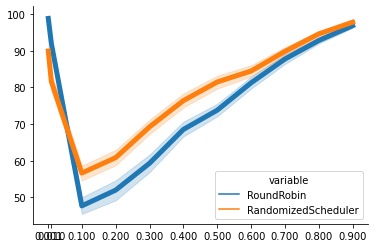

In [9]:
df_MRE = pd.melt(df, id_vars='p', 
                 #value_vars=['RoundRobin','RandomizedScheduler','RandomizedSchedulerP']
                 value_vars=['RoundRobin','RandomizedScheduler']
                 
                )

df_MRE

ax = sns.lineplot(data=df_MRE, 
             x="p", 
             y="value",
             hue="variable",
             lw=5)

#plt.legend([],[], frameon=False)
#ax.axhline(1, lw = 5, ls='--', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()

#ax.set_xticks([0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_xticks( [0.001,0.01,0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_ylim([.65, 1])
#ax.set_xlim([.5, 1.1])
#ax.set_yticks([1, 2, 3, 4, 5, 6, 7])

artifacts_path = '/home/david/Documents/online_budgetshare/fig/'

#txt="Run on practical workloads with t=500 trials each \nusing Private Multiplicative Weights (Hardt 2010)"
#plt.figtext(0.53, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=15)

plt.savefig(artifacts_path + "Testing.pdf", bbox_inches='tight')

# Adding manual sequences

In [10]:
def SeqRoundRobinStall(analysts, sequence, num_queries):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    i = 0
    for j in sequence:

        queue[j]  += 1
        #print(queue)
        if(queue[i] > 0):
                queue[i] -= 1
                i = (i+1) % analysts
        else:
            stall_count += 1
        #print(i)
    #print(stall_count)
    return(stall_count)



def SeqRandomSchedulerStall(analysts, sequence, num_queries):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    i = random.randint(0,analysts-1)
    for j in sequence:
        queue[j]  += 1
        #print(queue)
        if(queue[i] > 0):
                queue[i] -= 1
                i = random.randint(0,analysts-1)
        else:
            stall_count += 1
        #print(i)
    #print(queue)
    #print(stall_count)
    return(stall_count)

In [11]:
def SequenceFromDist(distribution, length):
    sequence = []
    for i in range(length):
        rand = random.random()
        prob = 0
        j = -1
        for i in range(len(distribution)):
            prob += distribution[i]
            if(rand <= prob):
                j = i
                break
        sequence.append(j)
        j = -1
    return(sequence)
            
    

In [12]:
dist = [0.1,1,1,1,1,1,1,1,1,1,1]
dist =[item / sum(dist) for item in dist]
dist

[0.009900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901,
 0.09900990099009901]

In [13]:

trials = 1000
dist = [0.1,1,1,1,1,1,1,1,1,1]
dist =[item / sum(dist) for item in dist]
df = pd.DataFrame(columns = ['p', 'RoundRobin', 'RandomizedScheduler'])

for j in range(trials):
    #sequence = SequenceFromDist([0.01,0.01,0.01,0.19,0.19,0.19,0.1,0.1,0.1,0.1],100)
    sequence = SequenceFromDist(dist, 100)
    num_queries = len(sequence)
    num_analysts = 10
    roundrobin = SeqRoundRobinStall(num_analysts ,sequence,num_queries)
    randomscheduler = SeqRandomSchedulerStall(num_analysts ,sequence, num_queries)
    df = df.append({'p' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler},  
    ignore_index = True)
#print(df.head(50))

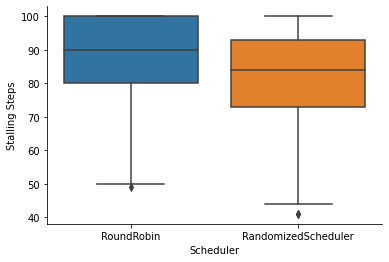

In [14]:
df_MRE = pd.melt(df, id_vars='p', 
                 #value_vars=['RoundRobin','RandomizedScheduler','RandomizedSchedulerP']
                 value_vars=['RoundRobin','RandomizedScheduler']
                 
                )

df_MRE
df_MRE.columns = df_MRE.columns.str.replace('variable', 'Scheduler')
df_MRE.columns = df_MRE.columns.str.replace('value', 'Stalling Steps')

#ax = sns.lineplot(data=df_MRE, 
#             x="p", 
#             y="value",
#             hue="variable",
#             lw=5)

sns.boxplot(x="Scheduler", y="Stalling Steps", data=df_MRE)
#plt.legend([],[], frameon=False)
#ax.axhline(1, lw = 5, ls='--', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()

#ax.set_xticks([0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_ylim([.65, 1])
#ax.set_xlim([.5, 1.1])
#ax.set_yticks([1, 2, 3, 4, 5, 6, 7])

artifacts_path = '/home/david/Documents/online_budgetshare/fig/'

#txt="Run on practical workloads with t=500 trials each \nusing Private Multiplicative Weights (Hardt 2010)"
#plt.figtext(0.53, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=15)

plt.savefig(artifacts_path + "under_represented1.pdf", bbox_inches='tight')

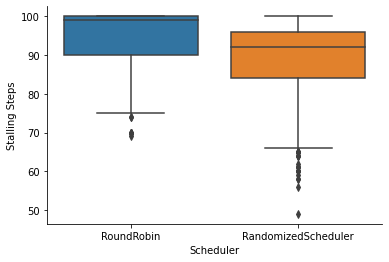

In [15]:

trials = 1000
dist = [0.1,0.1,1,1,1,1,1,1,1,1]
dist =[item / sum(dist) for item in dist]
df = pd.DataFrame(columns = ['p', 'RoundRobin', 'RandomizedScheduler'])

for j in range(trials):
    #sequence = SequenceFromDist([0.01,0.01,0.01,0.19,0.19,0.19,0.1,0.1,0.1,0.1],100)
    sequence = SequenceFromDist(dist, 100)
    num_queries = len(sequence)
    num_analysts = 10
    roundrobin = SeqRoundRobinStall(num_analysts ,sequence,num_queries)
    randomscheduler = SeqRandomSchedulerStall(num_analysts ,sequence, num_queries)
    df = df.append({'p' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler},  
    ignore_index = True)
#print(df.head(50))

df_MRE = pd.melt(df, id_vars='p', 
                 #value_vars=['RoundRobin','RandomizedScheduler','RandomizedSchedulerP']
                 value_vars=['RoundRobin','RandomizedScheduler']
                 
                )

df_MRE
df_MRE.columns = df_MRE.columns.str.replace('variable', 'Scheduler')
df_MRE.columns = df_MRE.columns.str.replace('value', 'Stalling Steps')

#ax = sns.lineplot(data=df_MRE, 
#             x="p", 
#             y="value",
#             hue="variable",
#             lw=5)

sns.boxplot(x="Scheduler", y="Stalling Steps", data=df_MRE)
#plt.legend([],[], frameon=False)
#ax.axhline(1, lw = 5, ls='--', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()

#ax.set_xticks([0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_ylim([.65, 1])
#ax.set_xlim([.5, 1.1])
#ax.set_yticks([1, 2, 3, 4, 5, 6, 7])

artifacts_path = '/home/david/Documents/online_budgetshare/fig/'

#txt="Run on practical workloads with t=500 trials each \nusing Private Multiplicative Weights (Hardt 2010)"
#plt.figtext(0.53, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=15)

plt.savefig(artifacts_path + "under_represented2.pdf", bbox_inches='tight')

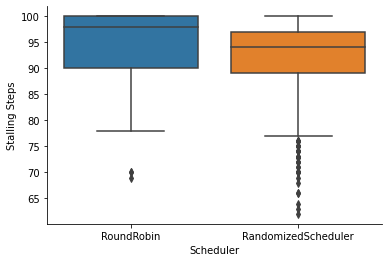

In [16]:

trials = 1000
dist = [0.1,0.1,0.1,1,1,1,1,1,1,1]
dist =[item / sum(dist) for item in dist]
df = pd.DataFrame(columns = ['p', 'RoundRobin', 'RandomizedScheduler'])

for j in range(trials):
    #sequence = SequenceFromDist([0.01,0.01,0.01,0.19,0.19,0.19,0.1,0.1,0.1,0.1],100)
    sequence = SequenceFromDist(dist, 100)
    num_queries = len(sequence)
    num_analysts = 10
    roundrobin = SeqRoundRobinStall(num_analysts ,sequence,num_queries)
    randomscheduler = SeqRandomSchedulerStall(num_analysts ,sequence, num_queries)
    df = df.append({'p' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler},  
    ignore_index = True)
#print(df.head(50))

df_MRE = pd.melt(df, id_vars='p', 
                 #value_vars=['RoundRobin','RandomizedScheduler','RandomizedSchedulerP']
                 value_vars=['RoundRobin','RandomizedScheduler']
                 
                )

df_MRE
df_MRE.columns = df_MRE.columns.str.replace('variable', 'Scheduler')
df_MRE.columns = df_MRE.columns.str.replace('value', 'Stalling Steps')

#ax = sns.lineplot(data=df_MRE, 
#             x="p", 
#             y="value",
#             hue="variable",
#             lw=5)

sns.boxplot(x="Scheduler", y="Stalling Steps", data=df_MRE)
#plt.legend([],[], frameon=False)
#ax.axhline(1, lw = 5, ls='--', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()

#ax.set_xticks([0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_ylim([.65, 1])
#ax.set_xlim([.5, 1.1])
#ax.set_yticks([1, 2, 3, 4, 5, 6, 7])

artifacts_path = '/home/david/Documents/online_budgetshare/fig/'

#txt="Run on practical workloads with t=500 trials each \nusing Private Multiplicative Weights (Hardt 2010)"
#plt.figtext(0.53, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=15)

plt.savefig(artifacts_path + "under_represented3.pdf", bbox_inches='tight')

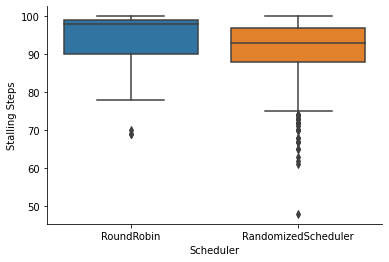

In [17]:

trials = 1000
dist = [0.1,0.1,0.1,1,1,1,1,1,1,1]
dist =[item / sum(dist) for item in dist]
df = pd.DataFrame(columns = ['p', 'RoundRobin', 'RandomizedScheduler'])

for j in range(trials):
    #sequence = SequenceFromDist([0.01,0.01,0.01,0.19,0.19,0.19,0.1,0.1,0.1,0.1],100)
    sequence = SequenceFromDist(dist, 100)
    num_queries = len(sequence)
    num_analysts = 10
    roundrobin = SeqRoundRobinStall(num_analysts ,sequence,num_queries)
    randomscheduler = SeqRandomSchedulerStall(num_analysts ,sequence, num_queries)
    df = df.append({'p' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler},  
    ignore_index = True)
#print(df.head(50))

df_MRE = pd.melt(df, id_vars='p', 
                 #value_vars=['RoundRobin','RandomizedScheduler','RandomizedSchedulerP']
                 value_vars=['RoundRobin','RandomizedScheduler']
                 
                )

df_MRE
df_MRE.columns = df_MRE.columns.str.replace('variable', 'Scheduler')
df_MRE.columns = df_MRE.columns.str.replace('value', 'Stalling Steps')

#ax = sns.lineplot(data=df_MRE, 
#             x="p", 
#             y="value",
#             hue="variable",
#             lw=5)

sns.boxplot(x="Scheduler", y="Stalling Steps", data=df_MRE)
#plt.legend([],[], frameon=False)
#ax.axhline(1, lw = 5, ls='--', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()

#ax.set_xticks([0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_ylim([.65, 1])
#ax.set_xlim([.5, 1.1])
#ax.set_yticks([1, 2, 3, 4, 5, 6, 7])

artifacts_path = '/home/david/Documents/online_budgetshare/fig/'

#txt="Run on practical workloads with t=500 trials each \nusing Private Multiplicative Weights (Hardt 2010)"
#plt.figtext(0.53, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=15)

plt.savefig(artifacts_path + "under_represented4.pdf", bbox_inches='tight')

In [18]:
trials = 100
df = pd.DataFrame(columns = ['LowProb', 'RoundRobin', 'RandomizedScheduler'])
for i in range(6):
    dist = [0.1]* i + [1]*(10-i)
    dist =[item / sum(dist) for item in dist]
    for j in range(trials):
        #sequence = SequenceFromDist([0.01,0.01,0.01,0.19,0.19,0.19,0.1,0.1,0.1,0.1],100)
        sequence = SequenceFromDist(dist, 100)
        num_queries = len(sequence)
        num_analysts = 10
        roundrobin = SeqRoundRobinStall(num_analysts ,sequence,num_queries)
        randomscheduler = SeqRandomSchedulerStall(num_analysts ,sequence, num_queries)
        df = df.append({'LowProb' : i, 'RoundRobin' : roundrobin, 'RandomizedScheduler' : randomscheduler},  
        ignore_index = True)
#print(df.head(50))

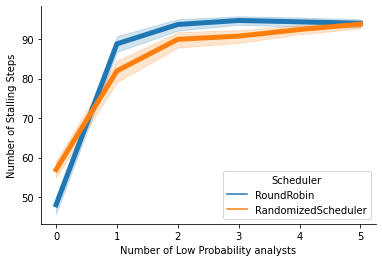

In [19]:
df_MRE = pd.melt(df, id_vars='LowProb', 
                 #value_vars=['RoundRobin','RandomizedScheduler','RandomizedSchedulerP']
                 value_vars=['RoundRobin','RandomizedScheduler']
                 
                )

df_MRE.columns = df_MRE.columns.str.replace('variable', 'Scheduler')
df_MRE.columns = df_MRE.columns.str.replace('value', 'Stalling Steps')
df_MRE



ax = sns.lineplot(data=df_MRE, 
             x="LowProb", 
             y="Stalling Steps",
             hue="Scheduler",
             lw=5)

#plt.legend([],[], frameon=False)
#ax.axhline(1, lw = 5, ls='--', color='black')

ax.set_xlabel('Number of Low Probability analysts')
ax.set_ylabel('Number of Stalling Steps')
sns.despine()

#ax.set_xticks([0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_xticks( [0.001,0.01,0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9])
#ax.set_ylim([.65, 1])
#ax.set_xlim([.5, 1.1])
#ax.set_yticks([1, 2, 3, 4, 5, 6, 7])

artifacts_path = '/home/david/Documents/online_budgetshare/fig/'

#txt="Run on practical workloads with t=500 trials each \nusing Private Multiplicative Weights (Hardt 2010)"
#plt.figtext(0.53, -0.05, txt, wrap=True, horizontalalignment='left', fontsize=15)

plt.savefig(artifacts_path + "under_represented_line.pdf", bbox_inches='tight')

# Time to completion 

In [20]:
import numpy as np
import pandas as pd
import math
from src.hdmm.error import expected_error, strategy_supports_workload
from src.hdmm.matrix import EkteloMatrix
from typing import Tuple
import string
import random
from itertools import cycle, islice
import src.hdmm.workload as workload
import src.census_workloads as census
from src.workload_selection import workload_selection
import src.online.online_workloads as online_workloads
import seaborn as sns
import matplotlib.ticker as mtick



from matplotlib import pyplot as plt
from collections import OrderedDict
from src.hdmm.workload import AllRange

In [106]:
n=64
W_name = ['identity', 'H2', 'race1', 'race2', 'race3', 'prefix_sum']#, 'total',]
W_lst = [online_workloads.identity(n), online_workloads.H2(n), online_workloads.race1(), online_workloads.race2(), online_workloads.race3(), online_workloads.prefix_sum(n),online_workloads.custom(n),online_workloads.custom(n),online_workloads.custom(n),online_workloads.custom(n),] # online_workloads.total(n),]
#W_name = ['identity', 'H2', 'race1', 'race2', 'race3', 'custom', 'prefix_sum']#, 'total',]
#W_lst = [online_workloads.identity(n), online_workloads.H2(n), online_workloads.race1(), online_workloads.race2(), online_workloads.race3(), online_workloads.custom(n), online_workloads.prefix_sum(n),] # online_workloads.total(n),]

analysts = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
workloads = [random.choice(W_lst) for i in analysts]


In [81]:
def SeqRoundRobinComplete(analysts, sequence):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    timecount = 0
    i = 0
    for j in sequence:

        queue[j]  += 1
        #print(queue)
        if(queue[i] > 0):
                queue[i] -= 1
                i = (i+1) % analysts
        else:
            stall_count += 1
        #print(i)
    #print(stall_count)
    timecount = stall_count + len(sequence)
    return(timecount)



def SeqRandomSchedulerComplete(analysts, sequence):
    queue = [0]*analysts
    stall_count = 0
    is_stalled = False
    i = random.randint(0,analysts-1)
    for j in sequence:
        queue[j]  += 1
        #print(queue)
        if(queue[i] > 0):
                queue[i] -= 1
                i = random.randint(0,analysts-1)
        else:
            stall_count += 1
        #print(i)
    #print(queue)
    #print(stall_count)
    timecount = stall_count + len(sequence)
    return(timecount)

In [183]:
def SeqRoundRobinComplete2(analysts, sequence):
    queue = [0]*analysts
    analyst_list = list(range(analysts))
    stall_count = 0
    timecount = 0
    i = 0
    for j in range(len(sequence)):

        queue[sequence[j]]  += 1
        #print(queue)
        if(queue[analyst_list[i]] > 0):
                queue[analyst_list[i]] -= 1
                if(queue[analyst_list[i]] ==0 and analyst_list[i] not in sequence[j+1:len(sequence)] and len(analyst_list)>1 ):
                    del analyst_list[i]
                    i = i% len(analyst_list)
                    
                i = (i+1) % len(analyst_list)
        else:
            stall_count += 1
        #print(i)
    #print(stall_count)
    timecount = stall_count + len(sequence)
    return(timecount)



def SeqRandomSchedulerComplete2(analysts, sequence):
    queue = [0]*analysts
    analyst_list = list(range(analysts))
    stall_count = 0
    i = random.randint(0,len(analyst_list)-1)
    for j in sequence:
        queue[j]  += 1
        #print(queue)
        if(queue[analyst_list[i]] > 0):
                queue[i] -= 1
                if(queue[analyst_list[i]] ==0 and analyst_list[i] not in sequence[j+1:len(sequence)] and len(analyst_list)>1 ):
                    del analyst_list[i]
                i = random.randint(0,len(analyst_list)-1)
        else:
            stall_count += 1
        #print(i)
    #print(queue)
    #print(stall_count)
    timecount = stall_count + len(sequence)
    return(timecount)

In [194]:
print(SeqRandomSchedulerComplete(2,[0,1,1,1,1]))
print(SeqRandomSchedulerComplete2(2,[0,1,1,1,1]))

9
6


In [185]:
def random_scheduler(analysts: list, workloads: list, p : int = 0.1) -> Tuple: 
    """
    In a system with n analysts, this system schedules Alice's queries with a probability of p and 
    other analysts' queries with an equal probability of (1 - p) / (n - 1), i.e. uniform probability.
    
    Returns new workload of queries (2D np.array) and analyst labels (list) that label each query in the 
    new workload. 
    
    Takes: 
    - analysts: list of analyst names
    - workloads: list of workloads in order where analyst[i] has workloads[i]
    - p: probability that Alice has her query answered at any given step
    
    Returns: 
    - W_final: final workload
    - analyst_labels: labels the final workload where analyst_labels[i] is the analyst with query at W_final[i]
    
    Date: 5-27-2022
    """

    workloads_dict = dict(zip(analysts, workloads))
    val = 0
    # gives alice p, all other analysts equal weight left
    weights = [p if analyst<=val else (1-(p*val))/(len(analysts) - val) for analyst in analysts] 
    #print(weights)
    # points the query that analyst is at, e.g., {'a': 0, 'b': 0, ...}
    pointers = {analyst: 0 for analyst in analysts}

    num_queries_left = {analyst: len(workloads_dict[analyst]) for analyst in analysts}

    ordering = random.choices(analysts, weights, k=50000)
    #print(ordering)
    iterator = cycle(ordering)
    
    W = []
    analyst_labels = []

    for analyst in iterator: 
        if num_queries_left[analyst] > 0: 
            # add query to the workload
            pointer = pointers[analyst]
            W.append(workloads_dict[analyst][pointer])
            analyst_labels.append(analyst)

            num_queries_left[analyst] -= 1
            pointers[analyst] += 1
        if sum(num_queries_left.values()) == 0: # if no more queries left to ask
            break

    W_final = np.array(W)
    #list(zip(analyst_labels, W_final))
    return W_final, analyst_labels

In [157]:
W, analyst_labels = random_scheduler(analysts, workloads, 0.001)
print(analyst_labels)

[5, 9, 4, 5, 5, 3, 9, 8, 7, 5, 9, 5, 9, 7, 4, 9, 9, 4, 4, 3, 6, 9, 9, 5, 3, 6, 9, 7, 9, 9, 3, 7, 5, 8, 6, 6, 7, 8, 4, 7, 4, 7, 4, 4, 9, 7, 5, 8, 3, 9, 3, 4, 3, 4, 5, 9, 7, 3, 5, 7, 8, 4, 5, 6, 6, 8, 5, 7, 9, 7, 6, 3, 6, 3, 4, 7, 4, 6, 4, 7, 7, 5, 5, 7, 3, 3, 5, 3, 4, 4, 5, 3, 4, 5, 5, 5, 5, 6, 6, 3, 4, 3, 4, 7, 5, 3, 7, 9, 9, 6, 7, 5, 8, 3, 3, 9, 8, 7, 4, 8, 9, 9, 5, 9, 6, 5, 4, 3, 4, 3, 5, 4, 8, 5, 5, 3, 5, 4, 5, 5, 5, 3, 5, 3, 5, 6, 4, 6, 4, 4, 4, 6, 6, 9, 4, 4, 9, 8, 8, 3, 5, 3, 9, 8, 4, 9, 6, 5, 4, 4, 3, 7, 5, 6, 3, 5, 9, 6, 9, 7, 9, 6, 6, 6, 6, 3, 6, 8, 4, 9, 9, 5, 4, 5, 4, 8, 7, 4, 7, 8, 6, 7, 6, 9, 7, 6, 9, 4, 7, 3, 8, 3, 8, 6, 5, 4, 3, 5, 9, 3, 5, 6, 3, 5, 5, 7, 9, 6, 9, 7, 3, 6, 4, 3, 3, 4, 4, 6, 5, 8, 9, 9, 3, 3, 6, 5, 7, 3, 5, 5, 7, 9, 9, 7, 7, 4, 6, 9, 9, 3, 9, 6, 7, 8, 6, 7, 5, 6, 4, 9, 4, 7, 6, 3, 4, 4, 4, 8, 6, 3, 4, 9, 8, 4, 6, 6, 6, 9, 4, 5, 7, 4, 4, 5, 4, 7, 6, 6, 3, 6, 8, 9, 3, 8, 6, 9, 4, 5, 6, 5, 5, 7, 7, 8, 3, 8, 3, 3, 7, 9, 8, 8, 7, 5, 9, 5, 9, 8, 7, 8, 7, 5, 8, 

In [102]:
sns.set(font_scale=2)
sns.set_style("white")
artifactspath = '/home/david/Documents/online_budgetshare/fig/'
#artifactspath = "/Users/albertsun/Projects/artifacts/algexperiments/"

      Ind   PMW   SCR    RS    RR
0     640   640   640  1093  1109
1     640   640   640  1174  1144
2    1270  1270  1270  2238  2285
3     640   640   640  1170  1154
4      70    70    70   133   133
..    ...   ...   ...   ...   ...
495   200   200   200   335   353
496   200   200   200   360   360
497   640   640   640  1193  1173
498  1270  1270  1270  2285  2305
499  1200  1200  1200  2193  2174

[500 rows x 5 columns]


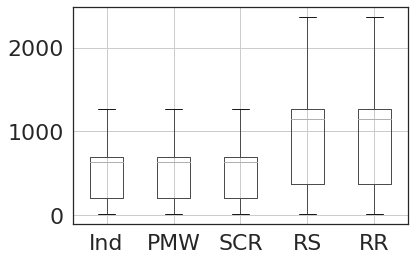

In [197]:
trials = 500
p = 0.01
test_data = pd.DataFrame(columns = ['Ind', 'PMW', 'SCR', 'RS','RR'])
for i in range(trials):
    c = np.random.randint(len(W_lst))
    analysts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    workloads = [W_lst[c] for i in analysts]
    W, analyst_labels = random_scheduler(analysts, workloads, p)
    test_data = test_data.append({'Ind' : len(analyst_labels), 'PMW' : len(analyst_labels),'SCR' : len(analyst_labels),'RS' : SeqRandomSchedulerComplete2(10,analyst_labels),'RR' : SeqRoundRobinComplete2(10,analyst_labels)}, 
                ignore_index = True)

print(test_data)
#test_data_1 = test_data.iloc[:,:5]
test_data_1 = pd.DataFrame(test_data, dtype='float')
ax = test_data_1.boxplot()
#ax.set_ylim(0, 50)
#plt.title('Alice gets her queries \nanswered with p = 0.1')
#plt.ylabel('Queries Answered')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(artifactspath + '0.01time.pdf', bbox_inches='tight')

      Ind   PMW   SCR    RS    RR
0     640   640   640   779   754
1      10    10    10    15    18
2     200   200   200   253   257
3     640   640   640   877   788
4    1270  1270  1270  1519  1415
..    ...   ...   ...   ...   ...
495  1270  1270  1270  1603  1485
496   640   640   640   856   761
497   640   640   640   794   767
498   640   640   640   784   767
499   610   610   610   835   786

[500 rows x 5 columns]


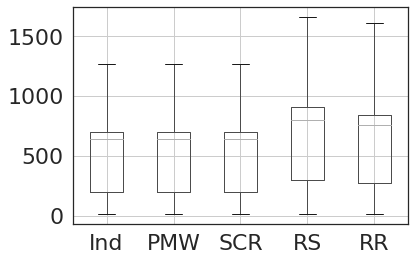

In [198]:
trials = 500
p = 0.1
test_data = pd.DataFrame(columns = ['Ind', 'PMW', 'SCR', 'RS','RR'])
for i in range(trials):
    c = np.random.randint(len(W_lst))
    analysts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    workloads = [W_lst[c] for i in analysts]
    W, analyst_labels = random_scheduler(analysts, workloads, p)
    test_data = test_data.append({'Ind' : len(analyst_labels), 'PMW' : len(analyst_labels),'SCR' : len(analyst_labels),'RS' : SeqRandomSchedulerComplete2(10,analyst_labels),'RR' : SeqRoundRobinComplete2(10,analyst_labels)}, 
                ignore_index = True)

print(test_data)
#test_data_1 = test_data.iloc[:,:5]
test_data_1 = pd.DataFrame(test_data, dtype='float')
ax = test_data_1.boxplot()
#ax.set_ylim(0, 50)
#plt.title('Alice gets her queries \nanswered with p = 0.1')
#plt.ylabel('Queries Answered')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(artifactspath + '0.1time.pdf', bbox_inches='tight')

      Ind   PMW   SCR    RS    RR
0     640   640   640   789   837
1    1270  1270  1270  1573  1459
2    1270  1270  1270  1597  1511
3     640   640   640   849   792
4      70    70    70   100   100
..    ...   ...   ...   ...   ...
495    10    10    10    19    18
496   200   200   200   266   287
497   640   640   640   862   787
498   640   640   640   838   805
499    70    70    70   113    95

[500 rows x 5 columns]
      Ind   PMW   SCR    RS    RR
0     640   640   640   789   837
1    1270  1270  1270  1573  1459
2    1270  1270  1270  1597  1511
3     640   640   640   849   792
4      70    70    70   100   100
..    ...   ...   ...   ...   ...
495    10    10    10    19    18
496   200   200   200   266   287
497   640   640   640   862   787
498   640   640   640   838   805
499    70    70    70   113    95

[500 rows x 5 columns]


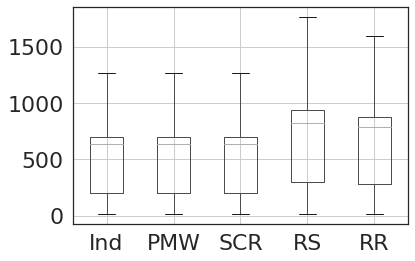

In [199]:
trials = 500
p = 0.5
test_data = pd.DataFrame(columns = ['Ind', 'PMW', 'SCR', 'RS','RR'])
for i in range(trials):
    c = np.random.randint(len(W_lst))
    analysts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    workloads = [W_lst[c] for i in analysts]
    W, analyst_labels = random_scheduler(analysts, workloads, p)
    test_data = test_data.append({'Ind' : len(analyst_labels), 'PMW' : len(analyst_labels),'SCR' : len(analyst_labels),'RS' : SeqRandomSchedulerComplete2(10,analyst_labels),'RR' : SeqRoundRobinComplete2(10,analyst_labels)}, 
                ignore_index = True)
print(test_data)
print(test_data)
#test_data_1 = test_data.iloc[:,:5]
test_data_1 = pd.DataFrame(test_data, dtype='float')
ax = test_data_1.boxplot()
#ax.set_ylim(0, 50)
#plt.title('Alice gets her queries \nanswered with p = 0.1')
#plt.ylabel('Queries Answered')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(artifactspath + '0.5time.pdf', bbox_inches='tight')

      Ind   PMW   SCR    RS    RR
0     700   700   700   888   842
1    1270  1270  1270  1505  1483
2     640   640   640   812   788
3     610   610   610   823   747
4     610   610   610   918   747
..    ...   ...   ...   ...   ...
495   640   640   640   798   774
496    70    70    70   104   104
497  1270  1270  1270  1566  1446
498  1200  1200  1200  1511  1431
499    10    10    10    17    15

[500 rows x 5 columns]
      Ind   PMW   SCR    RS    RR
0     700   700   700   888   842
1    1270  1270  1270  1505  1483
2     640   640   640   812   788
3     610   610   610   823   747
4     610   610   610   918   747
..    ...   ...   ...   ...   ...
495   640   640   640   798   774
496    70    70    70   104   104
497  1270  1270  1270  1566  1446
498  1200  1200  1200  1511  1431
499    10    10    10    17    15

[500 rows x 5 columns]


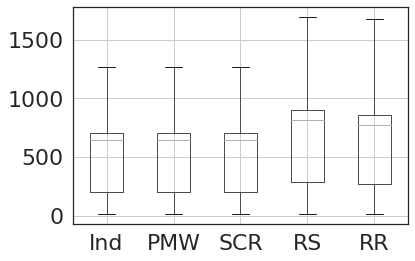

In [200]:
trials = 500
p = 0.9
test_data = pd.DataFrame(columns = ['Ind', 'PMW', 'SCR', 'RS','RR'])
for i in range(trials):
    c = np.random.randint(len(W_lst))
    analysts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    workloads = [W_lst[c] for i in analysts]
    W, analyst_labels = random_scheduler(analysts, workloads, p)
    test_data = test_data.append({'Ind' : len(analyst_labels), 'PMW' : len(analyst_labels),'SCR' : len(analyst_labels),'RS' : SeqRandomSchedulerComplete2(10,analyst_labels),'RR' : SeqRoundRobinComplete2(10,analyst_labels)}, 
                ignore_index = True)
print(test_data)
print(test_data)
#test_data_1 = test_data.iloc[:,:5]
test_data_1 = pd.DataFrame(test_data, dtype='float')
ax = test_data_1.boxplot()
#ax.set_ylim(0, 50)
#plt.title('Alice gets her queries \nanswered with p = 0.1')
#plt.ylabel('Queries Answered')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig(artifactspath + '0.9time.pdf', bbox_inches='tight')